In [1]:
import pandas as pd
import numpy as np
from glob import glob

import cv2
import matplotlib.pylab as plt

# Reading in Images

In [2]:
dog_files=glob('../input/cat-and-dog/training_set/training_set/dogs/*.jpg')
cat_files=glob('../input/cat-and-dog/training_set/training_set/cats/*.jpg')

In [3]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((232, 350, 3), (232, 350, 3))

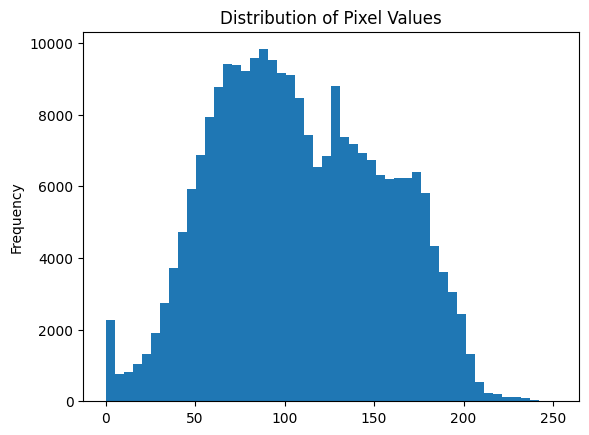

In [4]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

# Display Image

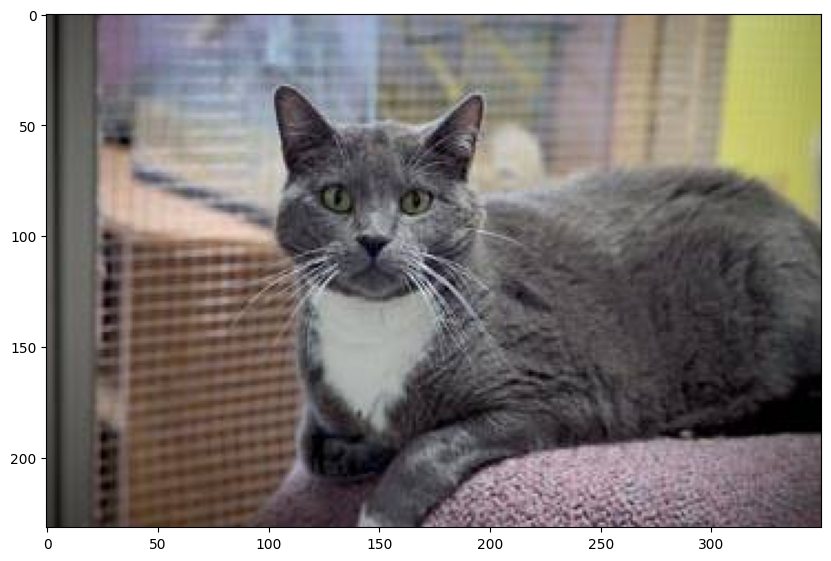

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
plt.show()

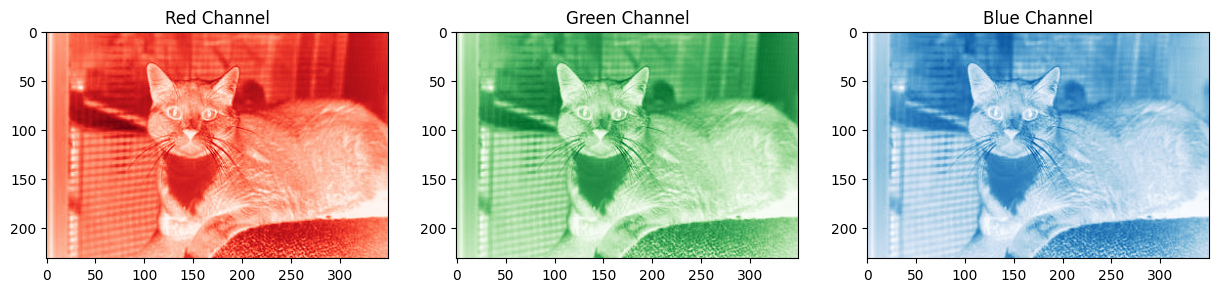

In [6]:
# Display RGB Channels of our images
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')

axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')


plt.show()


# Matplotlib vs cv2 Numpy Arrays
1. cv2 reads in channels as BGR
2.  matplotlib reads in channels as RGB

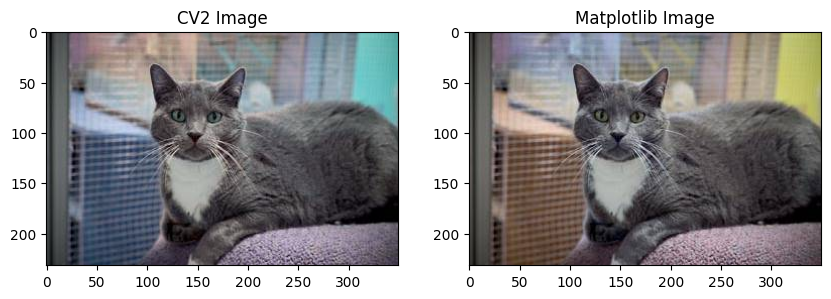

In [7]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')

plt.show()

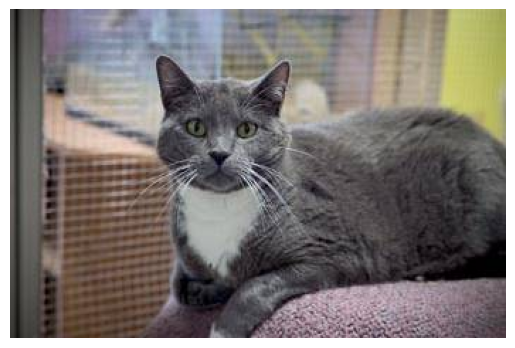

In [8]:
# converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Image Manipulation

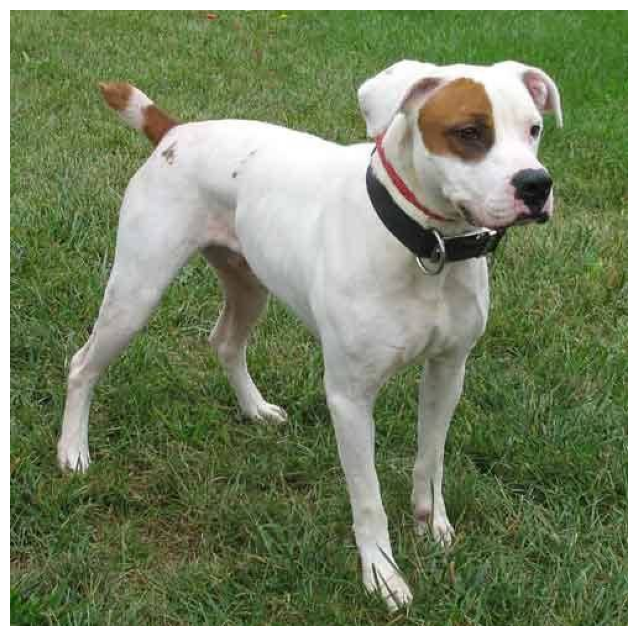

In [9]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img)
ax.axis('off')
plt.show()

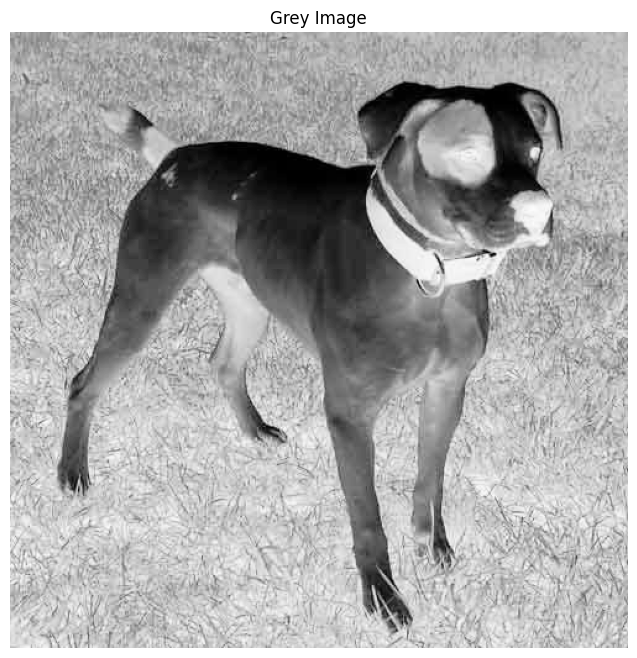

In [10]:
img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

# Resizing and Scaling

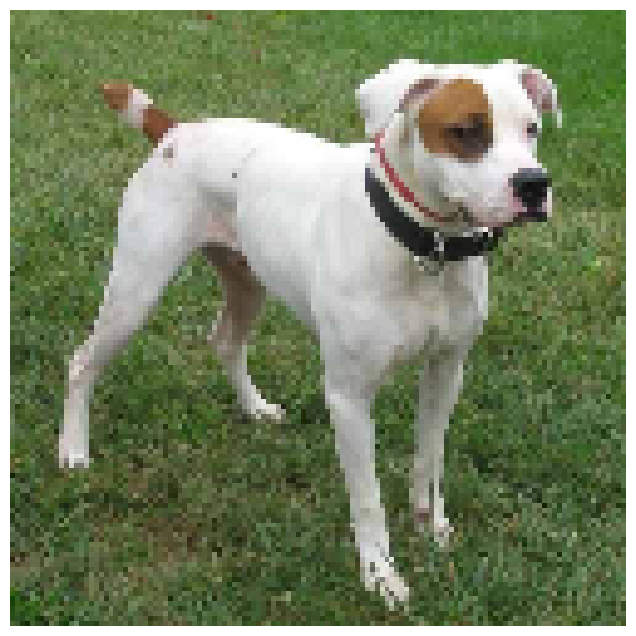

In [11]:
img_resized=cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

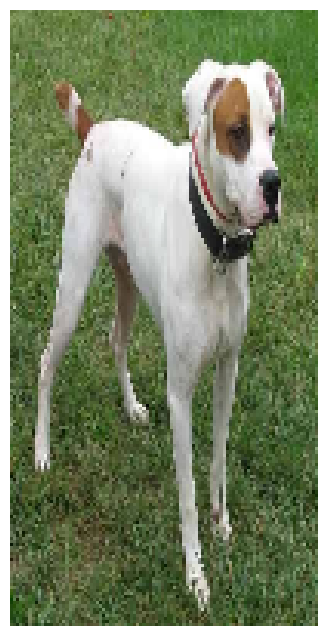

In [12]:
# Different
img_resized = cv2.resize(img, (100, 200))
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

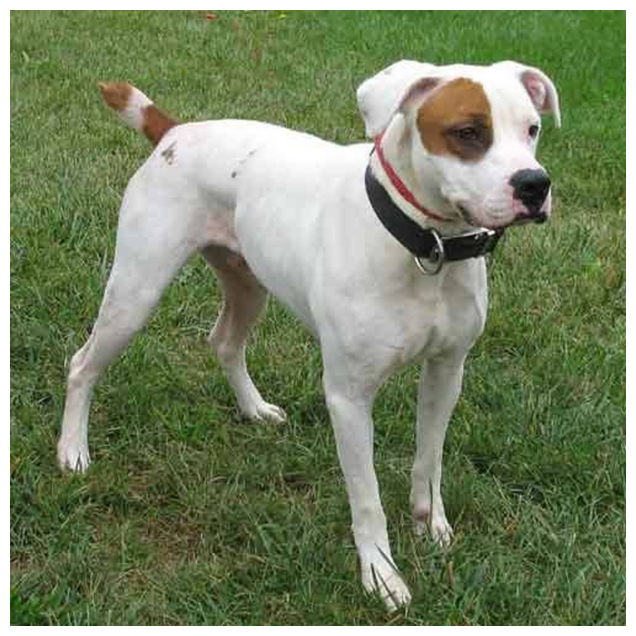

In [13]:
img_resized = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

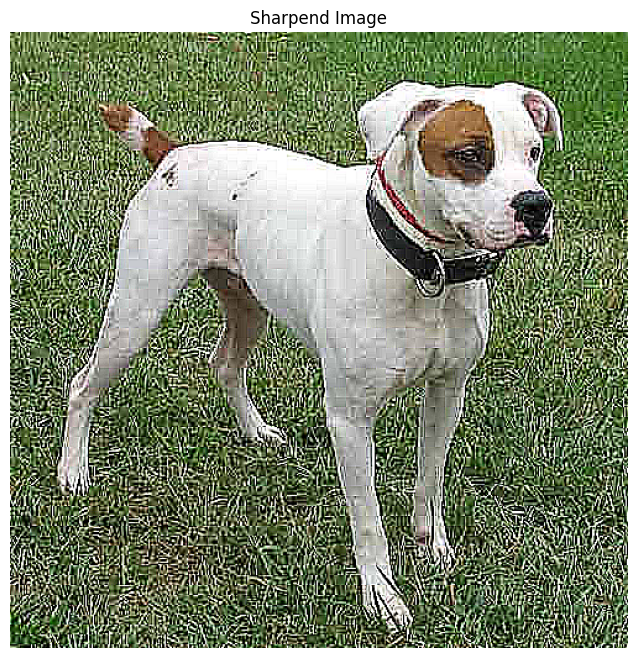

In [14]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]])
sharpend = cv2.filter2D(img,-1, kernel_sharpening )
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(sharpend)
ax.set_title('Sharpend Image')
ax.axis('off')
plt.show()

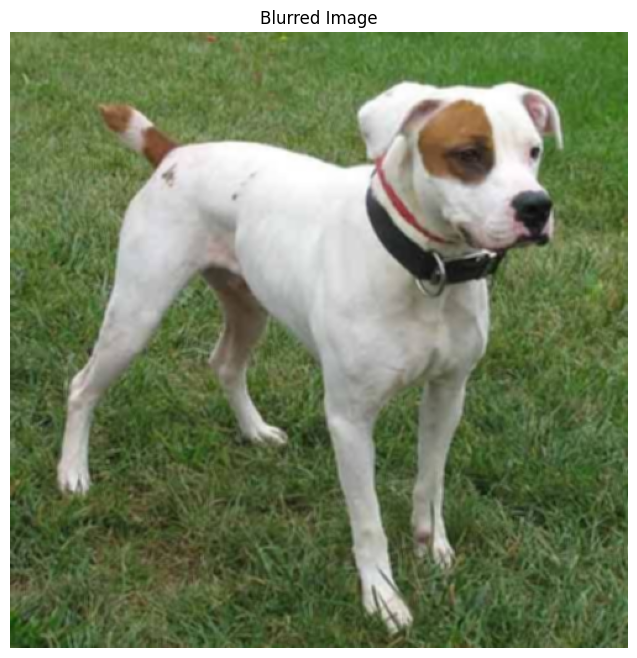

In [15]:
# Blurring the image
kernel_3by3 = np.ones((3,3), np.float32) / 9
blurred =cv2.filter2D(img, -1, kernel_3by3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

# Save Image

In [16]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True